In [1]:
! pip3 install geopy

In [2]:
!pip3 install openpyxl


In [3]:
! pip3 install aspose-cells


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from geopandas.tools import geocode
import geopandas
import numpy as np

df = pd.read_excel('https://query.data.world/s/m7dgmer4c47w7e6klm6g4u6onllvzp')

In [5]:

print(df)


    Continent           Country          City    Jan    Feb    Mar    Apr  \
0      Africa       Ivory Coast        Gagnoa  183.0  180.0  196.0  188.0   
1      Africa       Ivory Coast        Bouaké  242.0  224.0  219.0  194.0   
2      Africa       Ivory Coast       Abidjan  223.0  223.0  239.0  214.0   
3      Africa       Ivory Coast       Odienné  242.0  220.2  217.3  214.7   
4      Africa       Ivory Coast         Ferké  279.0  249.0  253.0  229.0   
..        ...               ...           ...    ...    ...    ...    ...   
333   Oceania       New Zealand      Auckland  228.8  194.9  189.2  157.3   
334   Oceania       New Zealand  Christchurch  224.4  190.5  177.4  155.6   
335   Oceania       New Zealand    Wellington  240.3  205.0  194.7  153.8   
336   Oceania  Papua New Guinea  Port Moresby  182.0  158.0  184.0  200.0   
337   Oceania   Solomon Islands       Honiara  186.0  155.4  198.4  192.0   

       May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    Year  
0    

In [6]:
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#just some viz for testing
#df_gagnoa = df.loc[(df['City'] == 'Gagnoa')]
#df_gagnoa.plot()'

In [7]:
for index, row in df.iterrows():
  try:
    print(row['City'])
    information = geocode(row['City'], provider= 'nominatim', user_agent = 'xyz', timeout=5)
    df.loc[index, 'Longitude'] = information.geometry.loc[0].x
    df.loc[index, 'Latitude' ] = information.geometry.loc[0].y
  except TypeError:
    print('Coordinates of' + row['City'] + 'are not available.')
  except IndexError:
    pass 


Gagnoa
Bouaké
Abidjan
Odienné
Ferké
Cotonou
Parakou
Kandi
Lomé
Mango
Accra
Tamale
Kumasi
Garoua
N'Gaoundéré
Douala
Yaoundé
Libreville
Port-Gentil
Lagos
Makurdi
Jos
Kano
Sokoto
Port Sudan
Khartoum
Asmara
Ouagadougou
Ouahigouya
Niamey
N'Djamena
Abéché
Banjul
Dakar
Thiès
Mogadishu
Buloburde
Djibouti City
Ségou
Timbuktu
Bamako
Algiers
Tamanrasset
Tunis
Gabes
Rabat
Marrakech
Ouarzazate
Cairo
Alexandria
Helwan
Tripoli
Benghazi
Mombasa
Nairobi
Garissa
Lodwar
Luanda
Juba
Wau
Dar-es-Salaam
Zanzibar
Tabora
Dodoma
Mekelle
Addis Abeba
Brazaville
Pointe-Noire
Dolisie
Kinshasa
Lubumbashi
Nouadhibou
Nouakchott
Pretoria
Cape Town
Johannesburg
Bloemfontein
Upington
Durban
Maun
Gaborone
Ghanzi
Ndola
Lusaka
Livingstone
Harare
Bulawayo
Karonga
Blantyre
Mzuzu
Fianarantsoa
Toamasina
Antananarivo
Antsiranana
Mahajanga
Toliara
Maputo
Bangui
Birao
Kampala
Kampala
Entebbe
Bujumbura
Conakry
Kankan
Bissau
Bata
Malabo
Marsa Alam
Kharga
Dakhla Oasis
Keetmanshoop
Windhoek
Kabul
Baku
Dhaka
Beijing
Chongqing
Lhasa
Sha

In [8]:
#print(df)

/tmp/ipykernel_1061/1774941262.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which="minor", alpha=0.25)


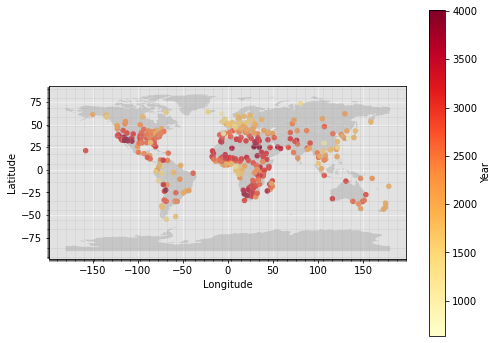

In [9]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
#countries = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
#countries[countries["name"] == "Australia"].plot(color="lightgrey",ax=ax)

countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries.head()
countries.plot(color='lightgrey', ax=ax)


# parse dates for plot's title
#first_month = df["acq_date"].min().strftime("%b %Y")
#last_month = df["acq_date"].max().strftime("%b %Y")

# plot points
df.plot(x='Longitude', y='Latitude', kind='scatter', c='Year', colormap='YlOrRd', ax=ax)
# get axes limits
x_lo, x_up = ax.get_xlim()
y_lo, y_up = ax.get_ylim()# add minor ticks with a specified sapcing (deg)
deg = 1
ax.set_xticks(np.arange(np.ceil(x_lo), np.ceil(x_up), deg), minor=True)
ax.set_yticks(np.arange(np.ceil(y_lo), np.ceil(y_up), deg), minor=True)
ax.grid(b=True, which="minor", alpha=0.25)
plt.show()

In [10]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
import folium
import branca.colormap as cm

In [12]:
map = folium.Map(location = [0.0, 0.0],tiles ='OpenStreetMap', zoom_start=2)
colormap = cm.LinearColormap(colors=['lightblue','yellow','red'], vmin=600,vmax=4020)
colormap.caption = 'Light-hours per year'

for i, row in df.iterrows():
    try:
        lat = df.at[i, 'Latitude']
        lng = df.at[i, 'Longitude']
        light = df.at[i, 'Year']
        #print(lat, lng)
        
        popup = 'City : ' + str(df.at[i, 'City']) + '<br>' + '<br>' +'Yearly Lighthours: ' + str(df.at[i, 'Year'])
        #folium.Marker(location = [lat, lng], popup= popup, icon = folium.Icon(color='blue')).add_to(m)
        #folium.Circle(radius=200000,location=[lat, lng], popup= popup,color='#3186cc', fill= True, fill_color = '#3186cc' ).add_to(m)
        folium.Circle(radius=250000,location=[lat, lng], popup= popup, color=colormap(light),fill= True).add_to(map)
    except ValueError:
        pass
    
map.add_child(colormap)
display(map)

In [13]:
map.save('map.html')